# Анализ оттока клиентов банка и сегментация пользователей по потреблению

## Общая информация
### Задача
Проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов.
* Провести исследовательский анализ данных.
* Сегментировать пользователей на основе данных о количестве потребляемых продуктов
* Сформулировать и проверить статистические гипотезы:

1. Гипотеза о связи между количеством используемого продукта и оттоком пользователей. 
2. Гипотеза о различии дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

### Описание данных
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки датасета:
* `userid` — идентификатор пользователя,
* `score` — баллы кредитного скоринга,
* `City` — город,
* `Gender` — пол,
* `Age` — возраст,
* `Objects` — количество объектов в собственности,
* `Balance` — баланс на счёте,
* `Products` — количество продуктов, которыми пользуется клиент,
* `CreditCard` — есть ли кредитная карта,
* `Loyalty` — активный клиент,
* `estimated_salary` — заработная плата клиента,
* `Churn` — ушёл или нет.


## Дашборд
https://public.tableau.com/app/profile/sofia8595/viz/_16526304269850/Dashboard1?publish=yes
## Презентация
https://disk.yandex.ru/i/cdJc3vYW6EZG2A

## Обзор данных
Составим первое представление о данных.

Импортируем необходимые для работы библиотеки

In [79]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats as st
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set(rc={'figure.figsize':(16,9)})

In [80]:
try:
    df = pd.read_csv('/datasets/bank_dataset.csv')
except FileNotFoundError as e:
    print(e)
    df = pd.read_csv('C:\\Users\\sofya\\OneDrive\\Рабочий стол\\PyScripts\\датасеты\\bank_dataset.csv')
df.head(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
5,15616748,645,Рыбинск,М,44,8,"113,755.78",2,1,0,"149,756.71",1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,"10,062.80",0
7,15698884,376,Ростов Великий,Ж,29,4,"115,046.74",4,1,0,"119,346.88",1
8,15835101,501,Ярославль,М,44,4,"142,051.07",2,0,1,"74,940.50",0
9,15635125,684,Ярославль,М,27,2,"134,603.88",1,1,1,"71,725.73",0


In [81]:
df.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,"10,000.00","10,000.00","10,000.00","10,000.00","6,383.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,733,676.57",650.53,38.92,5.01,"119,827.49",1.53,0.71,0.52,"100,090.24",0.20
std,"71,936.19",96.65,10.49,2.89,"30,095.06",0.58,0.46,0.50,"57,510.49",0.40
min,"15,608,437.00",350.00,18.00,0.00,"3,768.69",1.00,0.00,0.00,11.58,0.00
25%,"15,671,264.25",584.00,32.00,3.00,"100,181.98",1.00,0.00,0.00,"51,002.11",0.00
50%,"15,733,474.00",652.00,37.00,5.00,"119,839.69",1.00,1.00,1.00,"100,193.91",0.00
75%,"15,795,969.75",718.00,44.00,7.00,"139,512.29",2.00,1.00,1.00,"149,388.25",0.00
max,"15,858,426.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**Вывод** 

В датафрейме 10000 наблюдений. Представлены данные по пользователям банков: город проживания, пол, возраст, баланс, количество используемых продуктов, баллы кредитного скоринга, оцененная зароботная плата, наличие кредитной карты, активность и факт оттока. 

На первый взгляд данных достаточно для решения задачи. 

Типы данных адекватные, распределение в данных адекватное. 

Настораживает минимальная зароботная плата (11 против медианного 100193). Проверка распределения на адекватность осложняется тем, что мы не знаем наверняка валюту, в которой представлена зарплата. Учитывая географию и распределение зарплат у большинства похоже, что зарплата указана в рублях. В предобработке данных исследуем низкую зароботную плату подробнее.

Обнаружены пропуски в графе `Balance`. Необходимо исследовать пропуски и принять решение о целесообразности замены. 

Необходимо привести названия столбцов к змеиному регистру. 

## Предобработка данных
Приведем в порядок названия столбцов.

In [83]:
df.columns = df.columns.str.lower()
df.rename(columns = {'userid':'user_id', 'creditcard':'credit_card'}, inplace = True)
df.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0


Проверим количество уникальных пользователей

In [84]:
df['user_id'].nunique()

10000

Каждая строка - уникальный пользователь. 

Проверим уникальные названия городов.

In [85]:
df['city'].unique()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

Три города, всё в порядке. 

Посмотрим на возраст. 

In [86]:
print('Минимальный возраст:', df['age'].min())
print('Максимальный возраст:', df['age'].max())

Минимальный возраст: 18
Максимальный возраст: 92


Возраст в адекватных пределах. 

Проверим зароботную плату. 

In [87]:

df['estimated_salary'].describe()

count    10,000.00
mean    100,090.24
std      57,510.49
min          11.58
25%      51,002.11
50%     100,193.91
75%     149,388.25
max     199,992.48
Name: estimated_salary, dtype: float64

Минимальная зароботная плата настроаживает. Важно отметить, что представлена оцененная зароботная плата, т.е. если у клиента нет зарплатной карты в данном банке то данные в этой графе могут не соответствовать действительности. 

Предположим, что заоботная плата представлена в рублях (или в близкой валюте), по общему распределению это предположение кажется адекватным. 

Посмотрим внимательнее на клиентов с маленькой зароботной платой. 

Минимальная зароботная плата в России 13890. 

Предположим что часть людей могут работать на пол ставки. Узнаем, сколько людей получают меньше 6945

In [88]:
df_salary = df[df['estimated_salary'] < 6945]
df_salary.sample(10)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
9863,15768915,757,Ростов Великий,Ж,43,5,"131,433.33",2,1,1,"3,497.43",1
1462,15608947,616,Ростов Великий,Ж,41,1,"103,560.57",1,1,0,236.45,1
5264,15734553,547,Рыбинск,Ж,44,5,NaN,3,0,0,"5,459.07",1
9206,15654503,624,Ростов Великий,Ж,52,0,"133,723.43",1,0,0,"4,859.59",1
7060,15637041,712,Ярославль,Ж,32,1,NaN,2,1,0,"1,703.58",0
7046,15780363,589,Ростов Великий,Ж,20,2,"121,093.29",2,1,0,"3,529.72",0
8502,15617594,530,Ярославль,М,37,8,NaN,2,1,1,287.99,0
9340,15648540,737,Ярославль,М,45,10,NaN,2,1,0,"1,364.54",0
8166,15812519,542,Рыбинск,М,37,8,NaN,1,1,1,807.06,0
9954,15782586,645,Ярославль,М,45,6,"155,417.61",1,0,1,"3,449.22",0


In [89]:
len(df_salary)

353

In [90]:
df_salary.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,353.00,353.00,353.00,353.00,205.00,353.00,353.00,353.00,353.00,353.00
mean,"15,727,505.70",649.32,38.55,4.80,"118,289.04",1.54,0.66,0.52,"3,365.54",0.20
std,"73,749.39",99.23,10.37,2.89,"28,195.17",0.56,0.48,0.50,"1,985.48",0.40
min,"15,608,947.00",413.00,18.00,0.00,"27,517.15",1.00,0.00,0.00,11.58,0.00
25%,"15,662,671.00",583.00,31.00,2.00,"99,441.21",1.00,0.00,0.00,"1,568.91",0.00
50%,"15,724,286.00",648.00,37.00,5.00,"117,833.30",2.00,1.00,1.00,"3,414.72",0.00
75%,"15,790,493.00",712.00,44.00,7.00,"134,985.66",2.00,1.00,1.00,"5,008.23",0.00
max,"15,856,396.00",850.00,77.00,10.00,"204,510.94",4.00,1.00,1.00,"6,936.27",1.00


Клиентов с маленькой зароботной платой не слишком много (353) и по основным показателям (таким как возраст, баланс, количество объектов в собственности или баллы кредитного скоринга) они не отличаются от основной выборки. Нет оснований исключить из основной выборки или не доверять данным. 

Посмотрим на пропущеные значения в графе `баланс`

In [91]:
df['balance'].isna().sum()

3617

У трети клиентов пропуск в графе с болансом. Посмотрим, что это за клиенты. 

In [92]:
null_data = df[pd.isnull(df ["balance"])]
null_data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,"10,062.80",0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,"76,390.01",0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,"26,260.98",0


In [93]:
len(null_data)

3617

In [94]:
null_data.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,"3,617.00","3,617.00","3,617.00","3,617.00",0.00,"3,617.00","3,617.00","3,617.00","3,617.00","3,617.00"
mean,"15,734,685.59",649.45,38.43,5.07,NaN,1.78,0.72,0.52,"98,983.56",0.14
std,"71,947.49",96.16,10.49,2.86,NaN,0.50,0.45,0.50,"57,730.83",0.35
min,"15,608,442.00",350.00,18.00,0.00,NaN,1.00,0.00,0.00,90.07,0.00
25%,"15,672,255.00",583.00,31.00,3.00,NaN,1.00,0.00,0.00,"49,506.82",0.00
50%,"15,736,083.00",651.00,37.00,5.00,NaN,2.00,1.00,1.00,"98,618.79",0.00
75%,"15,796,286.00",717.00,43.00,7.00,NaN,2.00,1.00,1.00,"148,330.97",0.00
max,"15,858,100.00",850.00,88.00,10.00,NaN,4.00,1.00,1.00,"199,992.48",1.00


Распределение признаков у клиентов с пропущенными значениями в гафе баланс такое же, как у генеральной совокупности, какого-то отличающего признака не обнаружено. Можно предположить, что в случае отсутствия у клиента дебетовой карты система оставляет в графе с балансом пропущенное значение. 

Пропущенные значения могут быть препятствием для дальнейшей корректной работы. Заменим пропущенные значения на 0. Предварительно проверим, нет ли в базе людей с нулевым балансом, чтобы в дальнейшем быть уверенными 0 только в ячейках с пропущенным значением. 

In [95]:
len(df[df['balance'] == 0])

0

In [96]:
df['balance'].replace(np.nan, 0, inplace=True)
df['balance'].isna().sum()

0

In [97]:
df.duplicated().sum() #проверка на дубликаты

0

Дубликатов нет. 

Посмотрим на случайную выборку. 

In [98]:
df.sample(10)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
614,15703007,688,Ростов Великий,М,26,8,"146,133.39",1,1,1,"175,296.76",0
6324,15788748,729,Рыбинск,Ж,28,0,0.00,2,1,1,"31,165.06",1
9302,15795270,744,Ярославль,М,36,10,0.00,2,1,1,"182,867.84",0
9132,15779930,635,Ярославль,Ж,33,5,0.00,2,1,0,"122,949.71",0
5568,15637006,693,Ярославль,М,38,7,"198,338.77",2,1,1,"14,278.18",0
4974,15787678,638,Рыбинск,Ж,55,2,"155,828.22",1,0,1,"108,987.25",1
8813,15813111,850,Ростов Великий,Ж,26,8,"123,126.29",1,1,0,"74,425.41",0
6294,15785560,696,Ростов Великий,М,42,7,"162,318.61",1,1,0,"121,061.89",0
1566,15693799,524,Ростов Великий,Ж,37,9,"127,480.58",2,1,0,"179,634.69",0
816,15777301,696,Ярославль,М,29,8,0.00,2,1,0,"191,166.09",0


**Вывод**
* Заменили названия столбцов на змеиный регистр, проверили корректность данных, проверили данные на аномалии и дубликаты.

* Были обнаружены клиенты с заработной платой меньше минимальной. По другим параметрам эти клиенты выглядят адекватно, было принято решение оставить их без измененеий. 

* В столбце с балансом на счете клиента были пропущенные значения. Возможно, система таким образом распознает клиентов, не имеющих дебетовой карты. Было принято решение приравнять эти значения к нулю.


## Исследовательский анализ данных (EDA)


### Изучение распределений признаков
Посмотрим на разброс и распределение основных признаков, построим графики. Без привязки к оттоку пользоватлей. 

In [99]:
df.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,733,676.57",650.53,38.92,5.01,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,"15,608,437.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"15,671,264.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"15,733,474.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"15,795,969.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"15,858,426.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


*  10 000 чел уникальных клиентов

* В среднем это стабильные клиенты, имеющие результат кредитного скоринга равный в среднем 650 балла.

* Клиентам от 18 до 92 лет. Все совершеннолетние, среднему клиенту 39 лет.

* В среднем у клиентов в собственности 5 объектов.

* Баланс на счету в среднем около 80 000р. Если не брать в расчет клиентов, у которых отсутствует дебетовая карта, то около 120 000р.

* Клиенты пользуются от 1 до 4 продектами. В среднем клиенты пользуются 1-2 продуктами.

* Больше половины клиентов имеют кредитную карту. Но активно используют её около половины клиентов.

* Довольно высокий уровень зароботной платы для региональных городов (в среднем 100 000р.) даже учитывая клиентов, с зарплатой ниже прожиточного минимума.

* Более чем у половны клиентов есть действующий счет в банке.

* В выборке средний отток составляет 20%.

In [100]:
#зададим стандартную палитру для графиков
sns.set_palette('dark') 
#зададим цветовую палитру
colors = ['#E8C07D', '#9FC088', '#CC704B', '#614124']

Построим графики для номинальных переменных

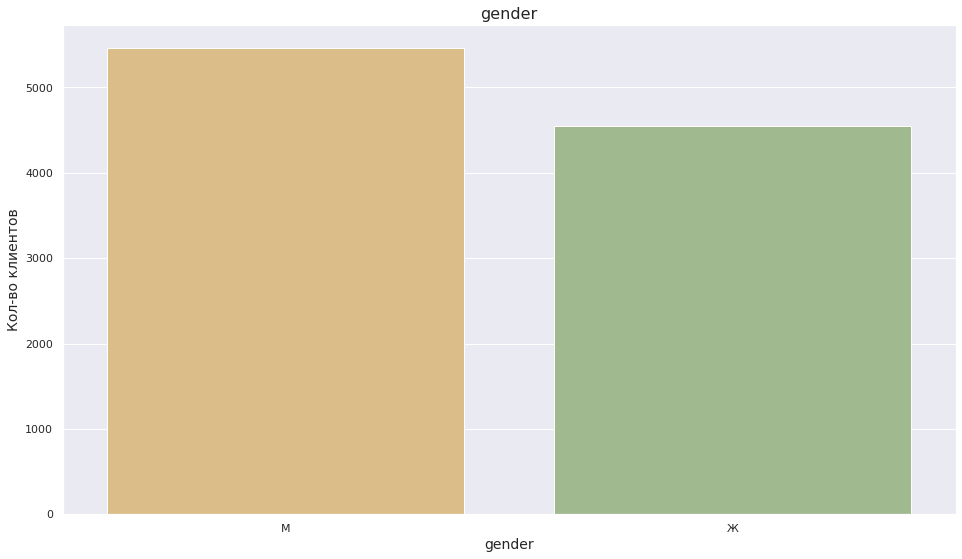

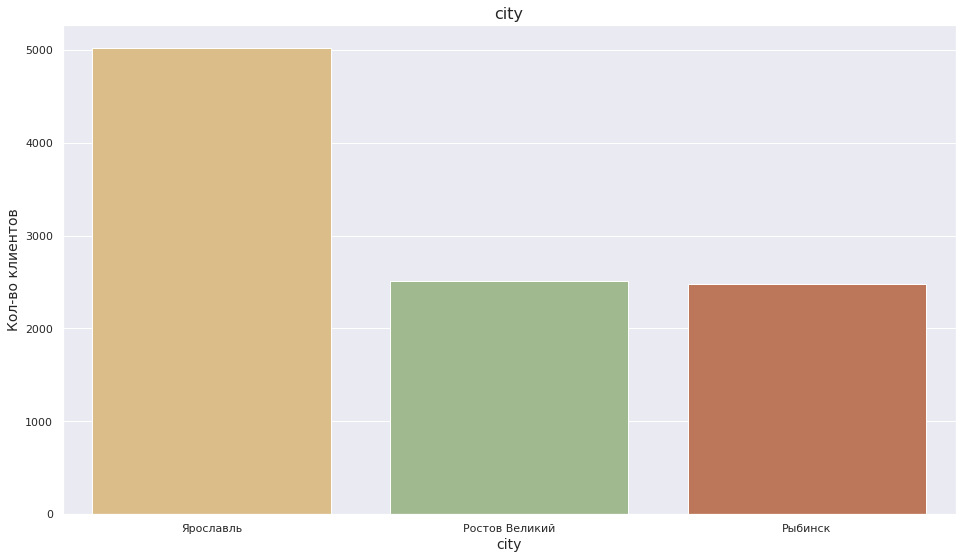

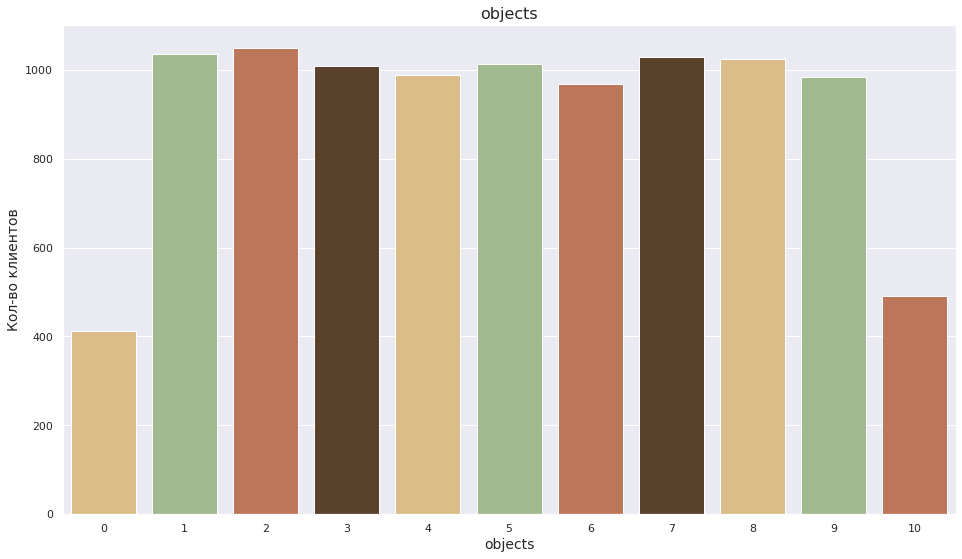

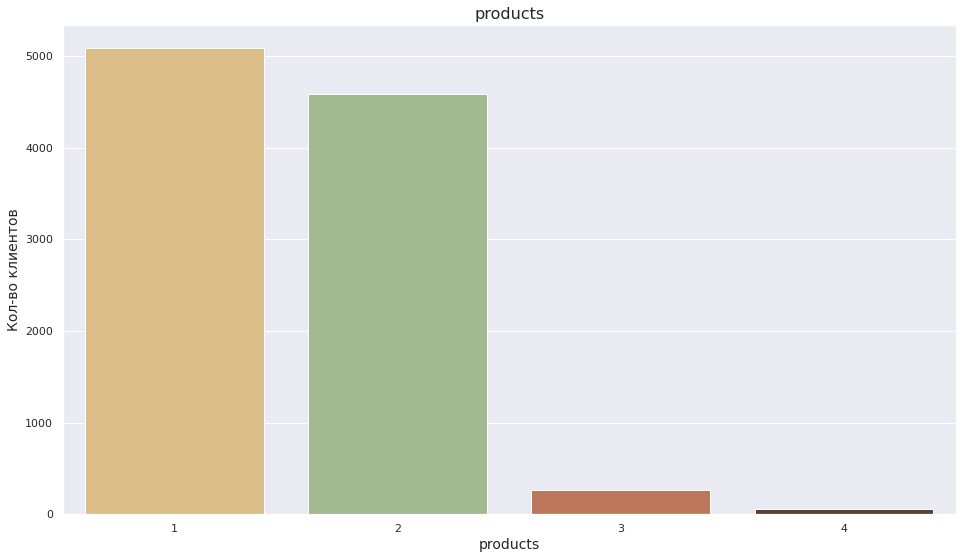

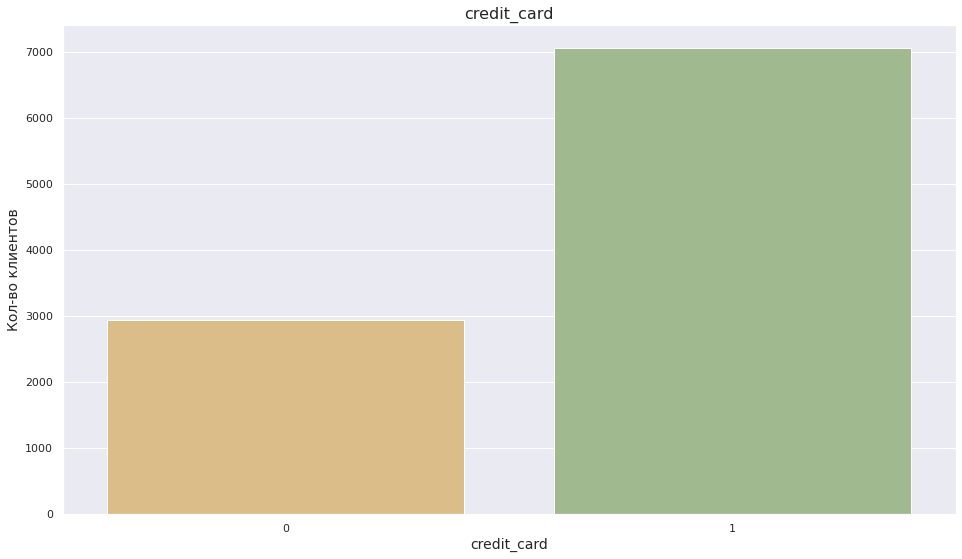

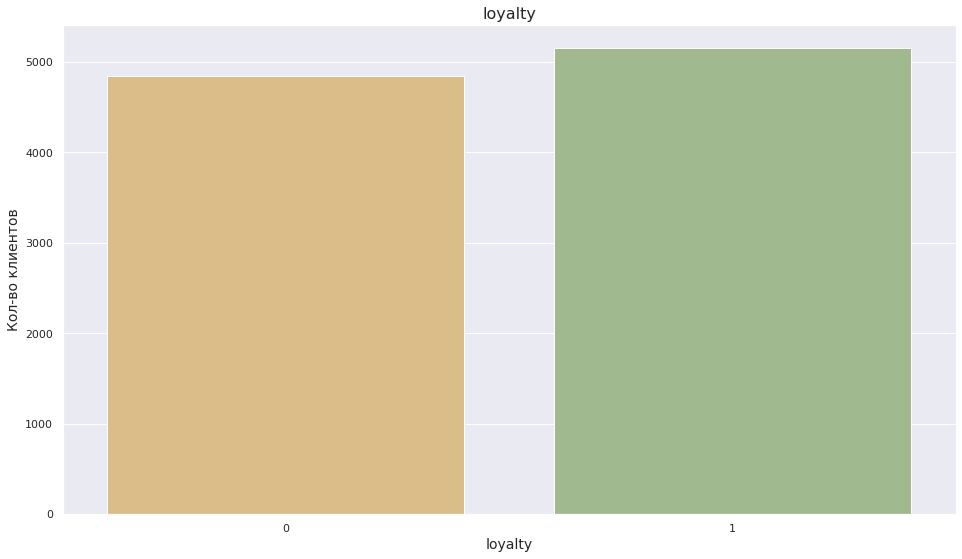

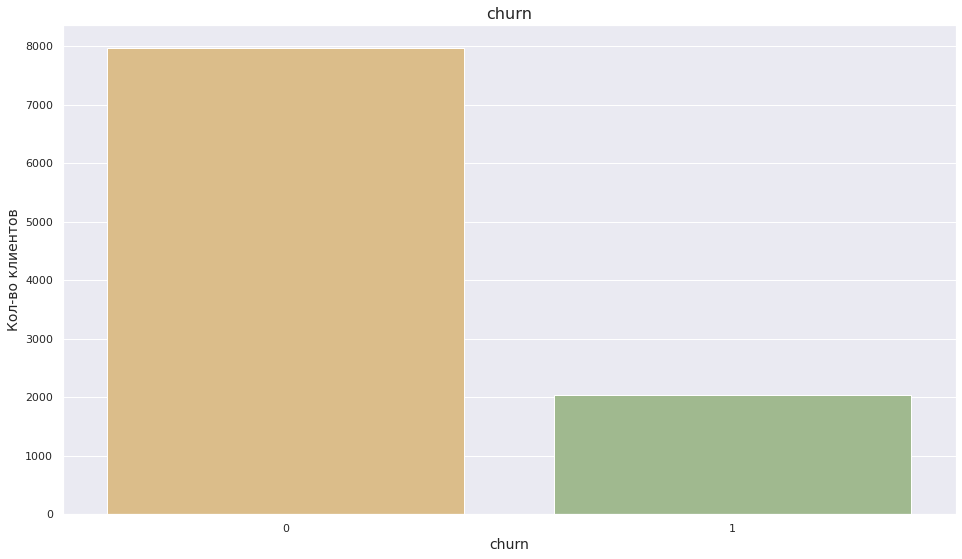

In [101]:
for column in ['gender', 'city', 'objects', 'products', 'credit_card', 'loyalty', 'churn']:
    report = df.groupby(column).count().reset_index().sort_values(by='user_id', ascending=False)
    ax = sns.barplot(x=column, y='user_id', data=report, palette=colors) 

    ax.set_ylabel('Кол-во клиентов', fontsize=14)
    ax.set_xlabel(column, fontsize=14)
    ax.set_title(column, fontsize=16)
    plt.show()



* Мужчин в выборке чуть больше, чем женщин. 
* В выборке 5000 человек из Ярославля, по 2500 из Ростова и Рыбинска. 
* Меньше всего людей не имеющих объектов недвижимости в собственности (примерно 400) и имеющих 10 объектов (500). Владельцев 2-9 объектов примерно одинаковое число (950-1050 человек)
* Большинство клиентов пользуются одним или двумы продуктами. Лишь немногие используют 3 или 4 продукта. 
* У большинства офомлена кредитная крта (7000 против 3000)
* Активны только половина клиентов
* Ушли 20% клиентов (2000 человек)

Построим диаграмму размаха для количественных переменных

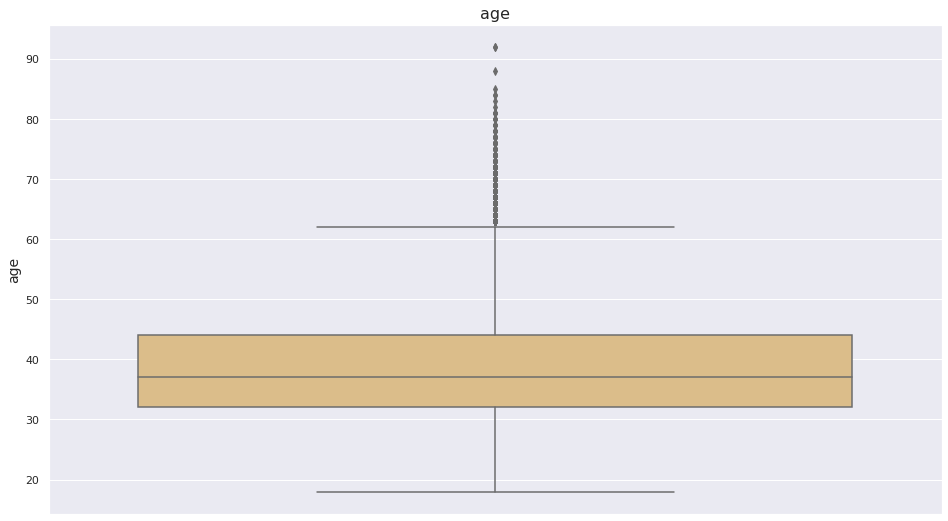

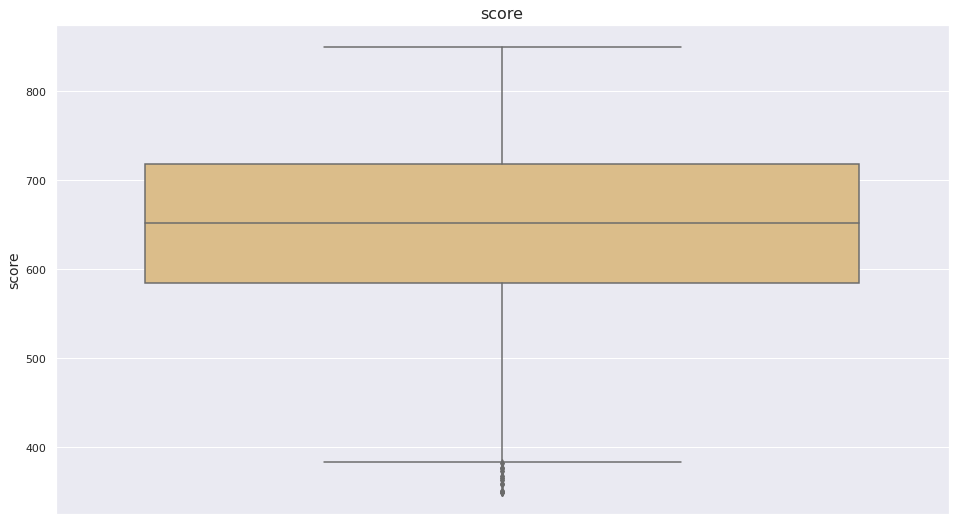

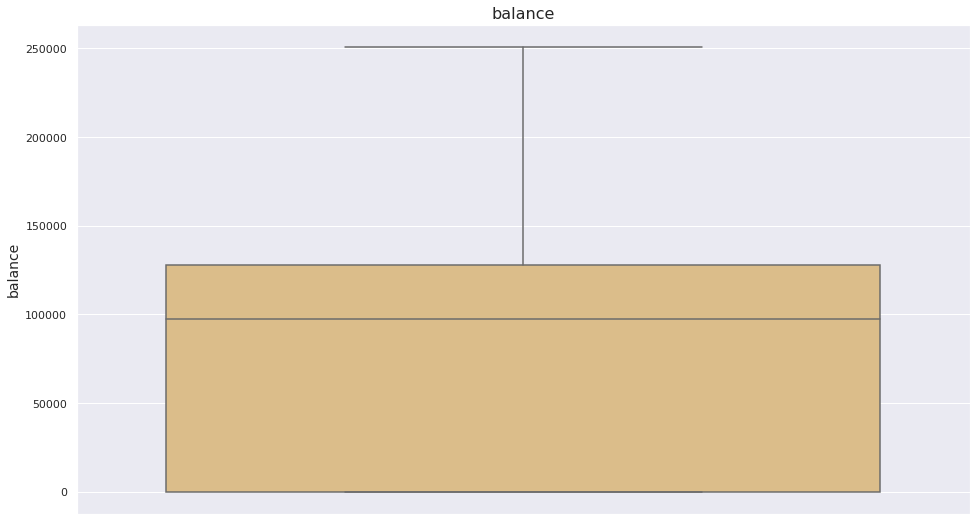

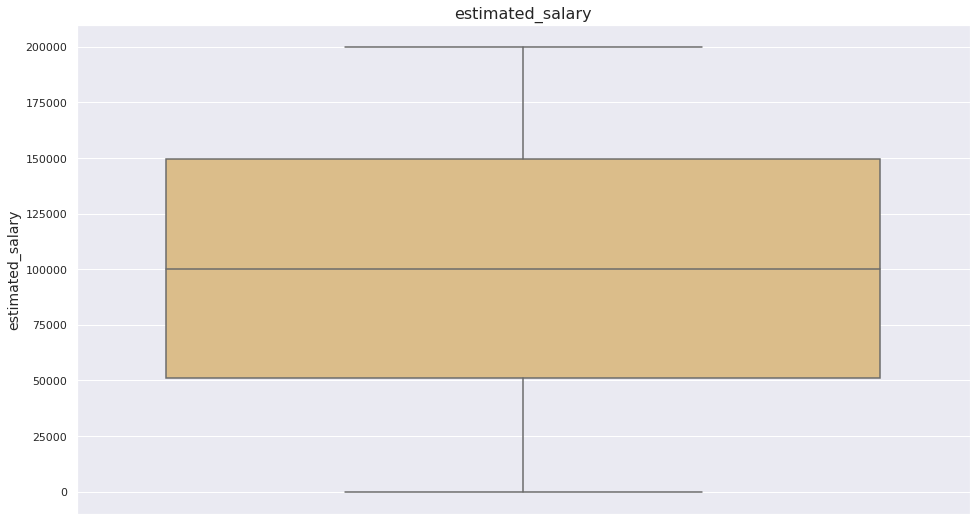

In [102]:
for column in ['age', 'score', 'balance', 'estimated_salary']:

    ax = sns.boxplot(y=column, data=df, palette=colors)

    ax.set_ylabel(column, fontsize=14)
    ax.set_title(column, fontsize=16)

    plt.show()

Построим диаграмму размаха по возрасту и полу клиентов.

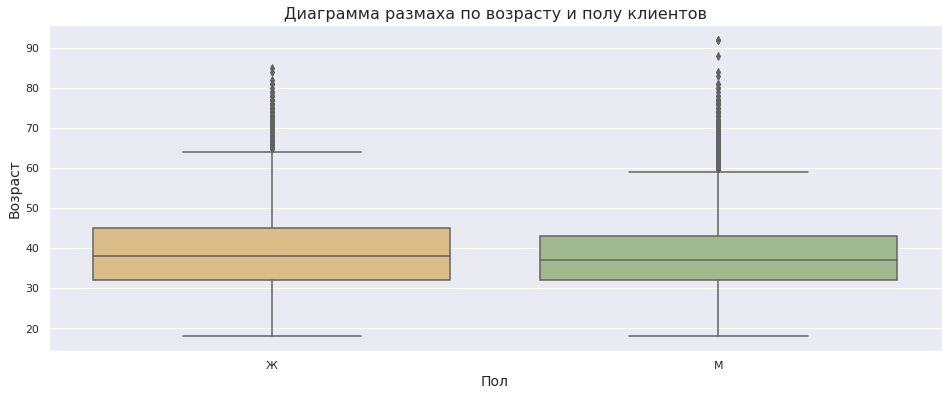

In [103]:
plt.figure(figsize=(16, 6)) 


ax = sns.boxplot(x='gender', y="age", data=df, palette=colors)


ax.set_xlabel("Пол", fontsize=14)
ax.set_ylabel("Возраст", fontsize=14)
ax.set_title('Диаграмма размаха по возрасту и полу клиентов', fontsize=16)

plt.show()

На диаграмме видно, что мужчины в среднем немного моложе женщин, но среди мужчин встречается больше выбросов (до 92 лет)

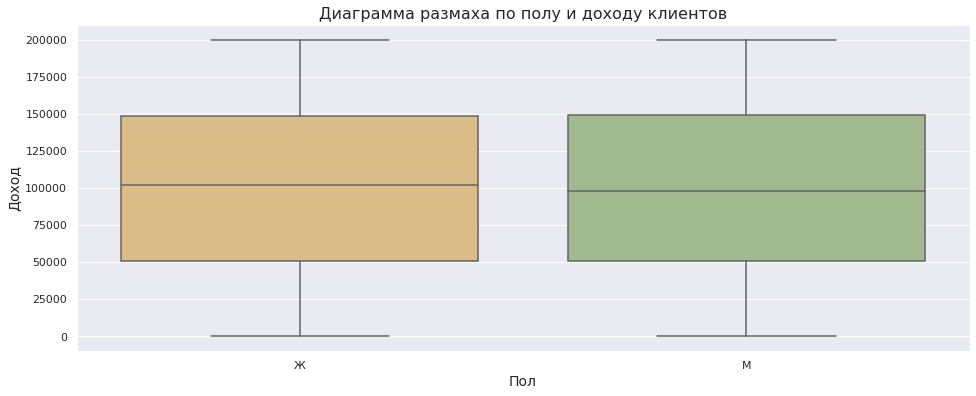

In [104]:
plt.figure(figsize=(16, 6)) 


ax = sns.boxplot(x='gender', y="estimated_salary", data=df, palette=colors)


ax.set_xlabel("Пол", fontsize=14)
ax.set_ylabel("Доход", fontsize=14)
ax.set_title('Диаграмма размаха по полу и доходу клиентов', fontsize=16)

plt.show()

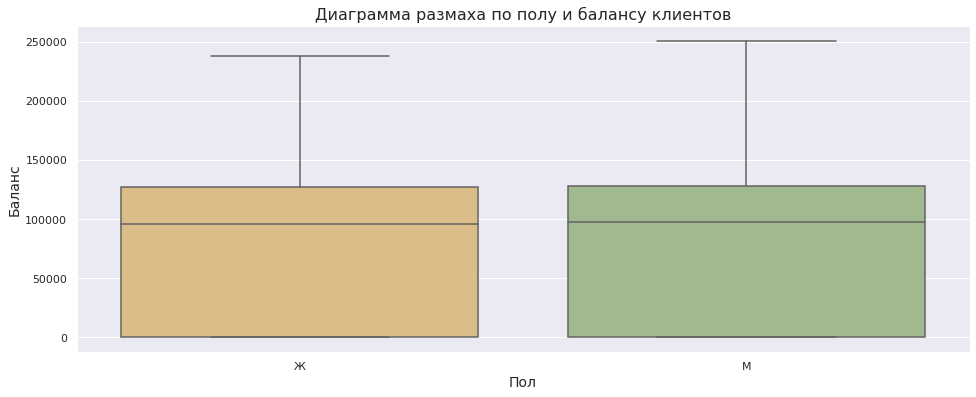

In [105]:
plt.figure(figsize=(16, 6)) 


ax = sns.boxplot(x='gender', y="balance", data=df, palette=colors)


ax.set_xlabel("Пол", fontsize=14)
ax.set_ylabel("Баланс", fontsize=14)
ax.set_title('Диаграмма размаха по полу и балансу клиентов', fontsize=16)

plt.show()

Доход и баланс у мужчин и женщин в выборке не различается

**Выводы**

*  10 000 чел уникальных клиентов

* В среднем это стабильные клиенты, имеющие результат кредитного скоринга равный в среднем 650 балла.

* Клиентам от 18 до 92 лет. Все совершеннолетние, среднему клиенту 39 лет.

* В среднем у клиентов в собственности 5 объектов.

* Баланс на счету в среднем около 80 000р. Если не брать в расчет клиентов, у которых отсутствует дебетовая карта, то около 120 000р.

* Клиенты пользуются от 1 до 4 продектами. В среднем клиенты пользуются 1-2 продуктами.

* Больше половины клиентов имеют кредитную карту. Но активно используют её около половины клиентов.

* Довольно высокий уровень зароботной платы для региональных городов (в среднем 100 000р.) даже учитывая клиентов, с зарплатой ниже прожиточного минимума.

* Более чем у половны клиентов есть действующий счет в банке.

* Мужчин в выборке чуть больше, чем женщин. Мужчины и женщины пользуются банковскими услугами одинаково

* В выборке 5000 человек из Ярославля, по 2500 из Ростова и Рыбинска. 

* Ушли 20% клиентов (2000 человек)



### Изучение распределений признаков в зависимости от оттока.
Сравним распределение основных признаков для тех, кто ушёл и тех, кто остался.

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [106]:
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightblue' if v else '' for v in is_min]

df.groupby('churn').agg('mean').T

churn,0,1
user_id,"15,733,903.88","15,732,787.96"
score,651.85,645.35
age,37.41,44.84
objects,5.03,4.93
balance,"72,745.30","91,108.54"
products,1.54,1.48
credit_card,0.71,0.70
loyalty,0.55,0.36
estimated_salary,"99,738.39","101,465.68"


На первый взгляд немного отличается балан (у ушедших клентов выше) и лояльность (лояльные клиенты чаще остаются). Немного отличается возврст (ушкдшие клиенты немного старше). 
Данные наблюдения отражают лишь первый взгляд на различия в данных, весомость этих параметров ещё предстоит доказать.

Построим графики для бинарных признаков.

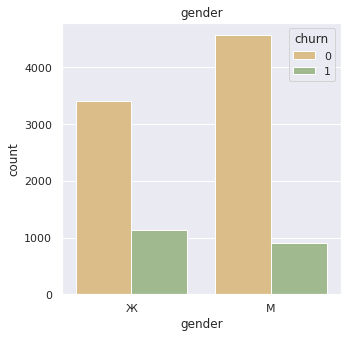

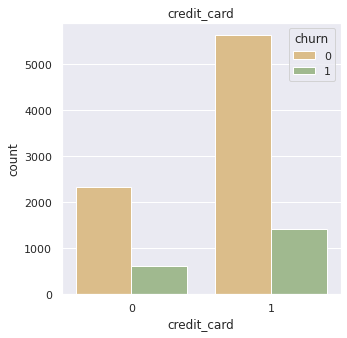

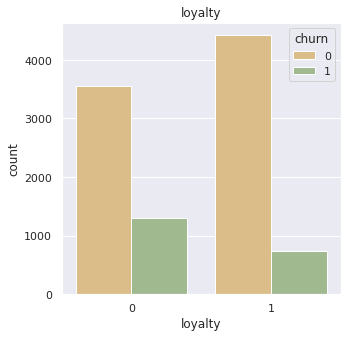

In [107]:
for column in ['gender', 'credit_card', 'loyalty']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df, palette=colors)
    plt.title(column)
    plt.show()

Женщины чуть чаще уходят в отток, чем мужчины. В отток заметно чаще попадают люди, у которых есть кредитная карта и неактивные клиенты. 

Для удобства работы с небинарными признакми выделим **категории**

In [108]:
df.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,733,676.57",650.53,38.92,5.01,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,"15,608,437.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"15,671,264.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"15,733,474.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"15,795,969.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"15,858,426.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


In [109]:
#напишем функцию по категоризации по числу объектов в собстенности
def objects_category(df):
    
    if df['objects'] == 0:
        return 'нет объектов'
    
    elif df['objects'] < 3:
        return '1-2 объекта'
    
    elif df['objects'] < 5:
        return '3-5 объектов'
    
    elif df['objects'] <= 7:
        return '5-7 объектов'
    
    else:
        return 'боле 7 объектов'

#добавим новый столбец в таблицу
df['objects_category'] = df.apply(objects_category, axis=1)


df['objects_category'].value_counts()


5-7 объектов       3007
боле 7 объектов    2499
1-2 объекта        2083
3-5 объектов       1998
нет объектов        413
Name: objects_category, dtype: int64

In [110]:
#напишем функцию, которая распределяет уровень дохода по категориям
def salary_category(df):
    
    if df['estimated_salary'] <= 50000:
        return 'низкий достаток'
    
    elif df['estimated_salary'] <= 100000:
        return 'средний достаток'
    
    else:
        return 'высокий достаток'

#добавим новый столбец в таблицу
df['salary_category'] = df.apply(salary_category, axis=1)

df['salary_category'].value_counts()

высокий достаток    5010
средний достаток    2537
низкий достаток     2453
Name: salary_category, dtype: int64

In [111]:
#напишем функцию, которая распределяет возраст по категориям
def age_category(df):
    
    if df['age'] <= 30:
        return 'молодой'
    
    elif df['age'] <= 55:
        return 'среднего возраста'
    
    else:
        return 'пенсионного возраста'

#добавим новый столбец в таблицу
df['age_category'] = df.apply(age_category, axis=1)

df['age_category'].value_counts()

среднего возраста       7232
молодой                 1968
пенсионного возраста     800
Name: age_category, dtype: int64

In [112]:
#напишем функцию, которая распределяет уровень дохода по категориям
def score_category(df):
    
    if df['score'] < 500:
        return 'низкий уровень'
    
    elif df['score'] <= 700:
        return 'средний уровень'
    
    else:
        return 'высокий уровень'

#добавим новый столбец в таблицу
df['score_category'] = df.apply(score_category, axis=1)

df['score_category'].value_counts()

средний уровень    6252
высокий уровень    3116
низкий уровень      632
Name: score_category, dtype: int64

In [113]:
#напишем функцию, которая распределяет баланс на счету по категориям
def balance_category(df):
    
    if df['balance'] <= 5000:
        return 'менее 5000р'
    
    elif df['balance'] <= 30000:
        return '5 000 - 30 000р'
    
    elif df['balance'] <= 50000:
        return '30 000 - 50 000р'
    
    elif df['balance'] <= 50000:
        return '50 000 - 100 000р'
    
    else:
        return 'более 100 000р'

#добавим новый столбец в таблицу
df['balance_category'] = df.apply(balance_category, axis=1)

df['balance_category'].value_counts()

более 100 000р      6308
менее 5000р         3618
30 000 - 50 000р      63
5 000 - 30 000р       11
Name: balance_category, dtype: int64

Построим тепловые карты для небинарных признаков. 

In [114]:
#функция для тепловых карт в абсолютных значениях и процентах
def heatmap_churn (column):
    #сводная таблица для тепловой карты в абсолютных значениях
    data = df\
        .pivot_table(
            index='churn',
            columns=column,
            values='user_id',
            aggfunc='count'
        )
    
    #заголовок
    print()
    print('Количество пользователей. Отток по категории', column)
    print()
    
    #график
    plt.figure(figsize=(12, 4))
    sns.heatmap(data, cmap='Reds', annot=True, fmt='.0f')
    plt.title(column)
    plt.show()
    
    # сводная таблица для тепловой карты в процентах
    data_new = data
    for group in data.columns:
        data_new[group] = (data[group] / data[group].sum()) * 100
          
    #заголовок
    print()
    print('Проценты. Отток по категории', column)
    print()
    
    #график
    plt.figure(figsize=(12, 4))
    sns.heatmap(data_new, cmap='Blues', annot=True, fmt='.0f')
    plt.title(column)
    plt.show()


Количество пользователей. Отток по категории objects_category



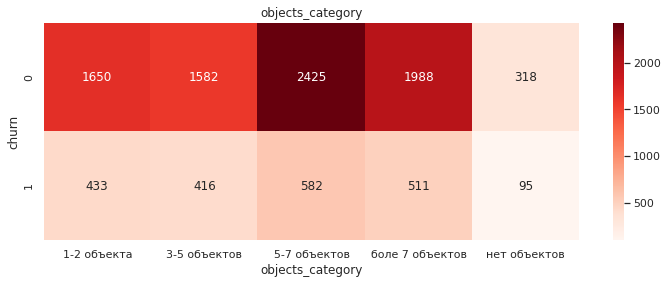


Проценты. Отток по категории objects_category



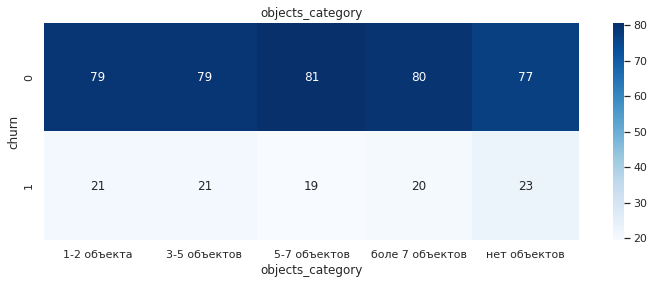

In [115]:
heatmap_churn ('objects_category')

По численности, чаще всего в отток уходят клиенты, имеющие во владении 5-7 объектов. Но это самая многочисленная группа. В процентном соотношении они реже всего уходят в отток (19% клиентов). Чаще всего уходят в отток клиенты, у которых нет объектов во владении (23%)


Количество пользователей. Отток по категории score_category



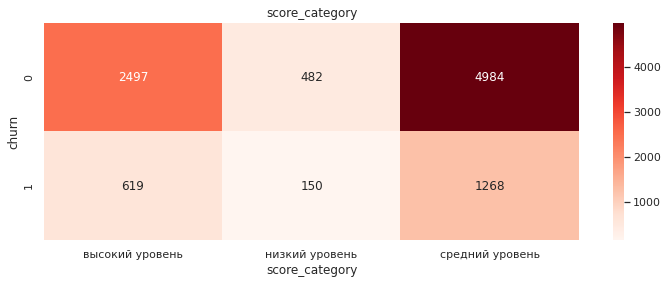


Проценты. Отток по категории score_category



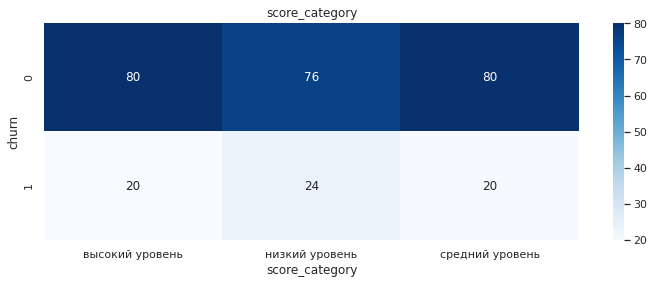

In [116]:
heatmap_churn ('score_category')


По процентам в отток попадает 20% от общего числа клиентов с высоким уровнем дохода, 20% от общего числа категории среднего дохода и 24% от общего числа в этой категории с низким уровнем.


Количество пользователей. Отток по категории salary_category



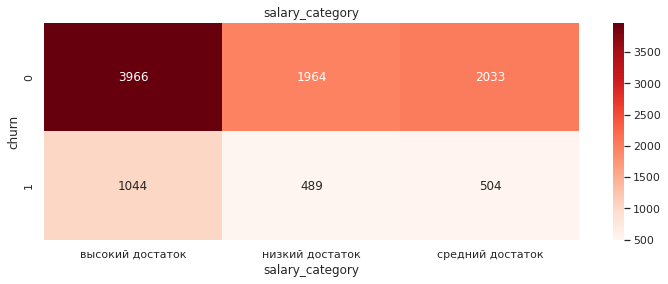


Проценты. Отток по категории salary_category



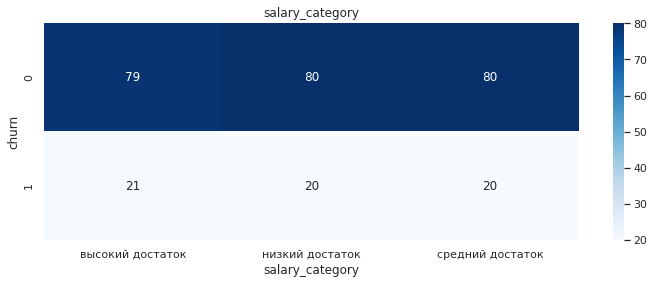

In [117]:
heatmap_churn ('salary_category')


По численности картина аналогична, больше по общей численности в отток попадает клиентов с высоким уровнем достатка. По процентам в отток попадает 21% (от общего числа в этой категории), со средним и низким уровнем дохода по 20% (от общего числа в этих категориях).


Количество пользователей. Отток по категории age_category



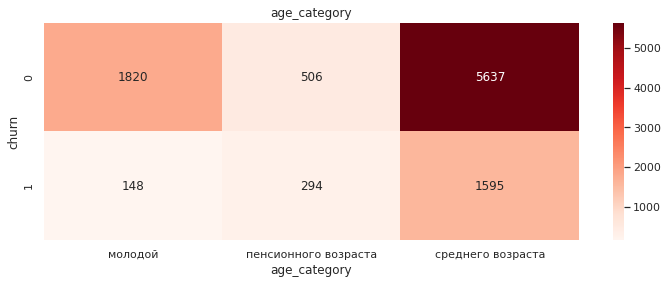


Проценты. Отток по категории age_category



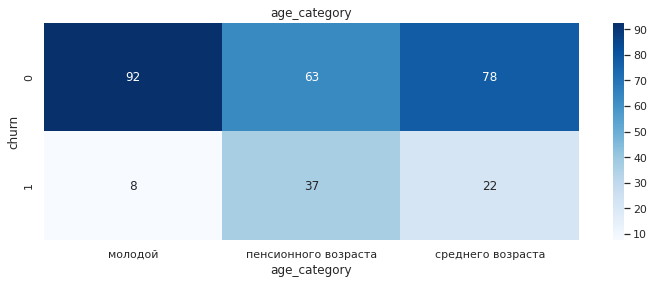

In [118]:
heatmap_churn ('age_category')


В отток уходит около 8% (от общего числа в этой категории) молодых клиентов, около 22% (от общего числа в этой категории) среднего возраста и 37% (от общего числа в этой категории) пенсионного возраста.


Количество пользователей. Отток по категории products



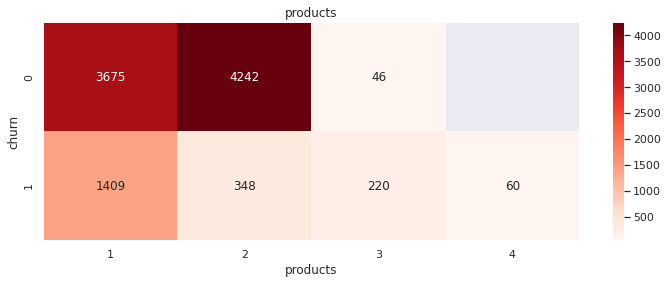


Проценты. Отток по категории products



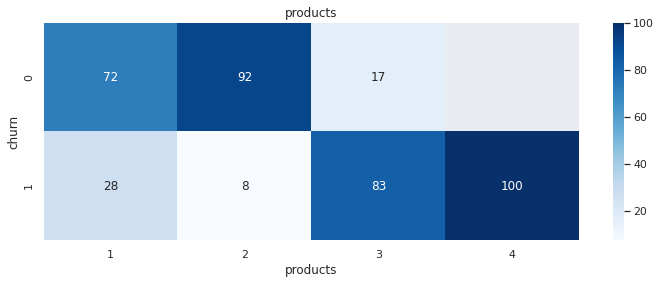

In [119]:
heatmap_churn ('products')


По численности, в отток уходит больше всего клиентов использующих 1 продукт, но это самая многочисленная категория.  Среди тех, кто пользуется 4 продуктами все попадают в отток. 83% клиентов использующих 3 продукта попадают в отток. 28% использующих 1 продукт попадают в отток и только 8% использующих 2 продукта клиентов попадают в отток, это самая постоянная группа. 


Количество пользователей. Отток по категории balance_category



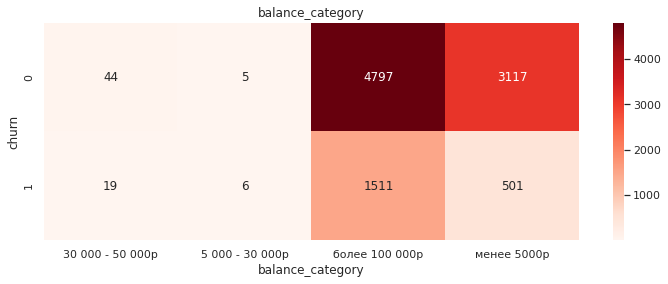


Проценты. Отток по категории balance_category



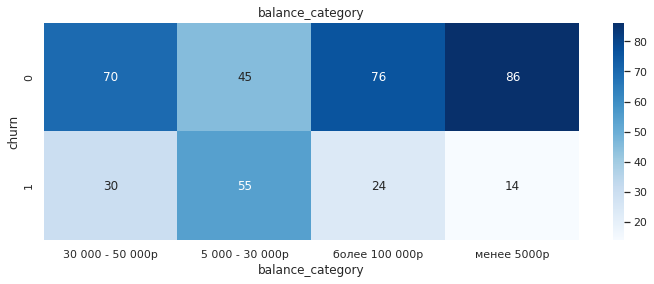

In [120]:
heatmap_churn ('balance_category')


В данной выборке по численности больше всего в отток уходит клиентов с балансом счета более 100к, это составляет 24% от общего числа в этой категории. Среди клиентов с балансом 30-50к уходит в отток 30% , клиентов с балансом 5-30к по численности в отток уходит меньше всего, однако это 55% от общего числа в этой категории. Клиентов с балансом менее 5к уходит в отток 14%, это самая постоянная группа.


Количество пользователей. Отток по категории gender



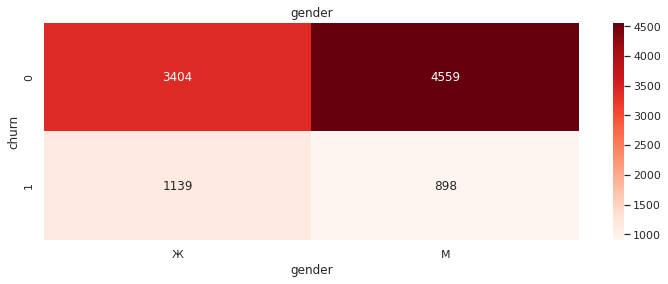


Проценты. Отток по категории gender



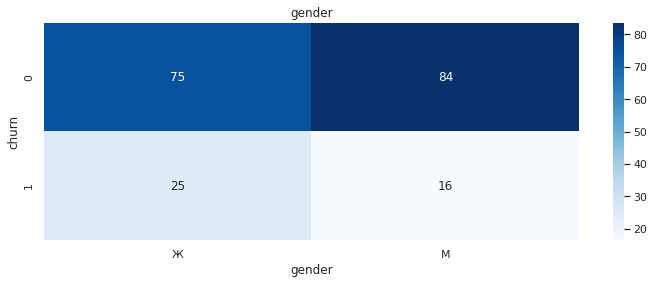

In [121]:
heatmap_churn ('gender')

Женищины попадают в отток на 9% чаще, чем мужчины


Количество пользователей. Отток по категории city



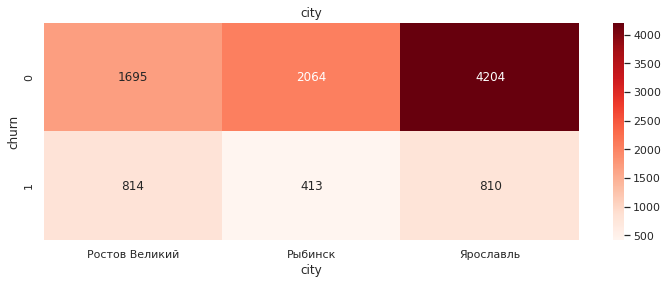


Проценты. Отток по категории city



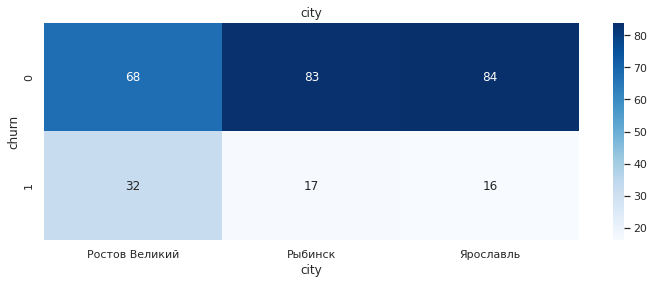

In [122]:
heatmap_churn ('city')

32% Клиентов из Ростова попадают в отток. В два раза больше, чем в других городах (в Рыбинске и Ярославле - 17% и 16% соответственно)


Количество пользователей. Отток по категории credit_card



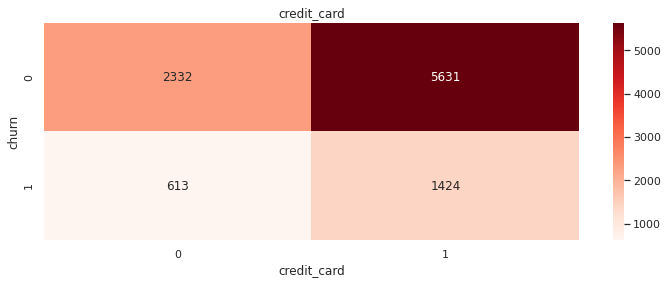


Проценты. Отток по категории credit_card



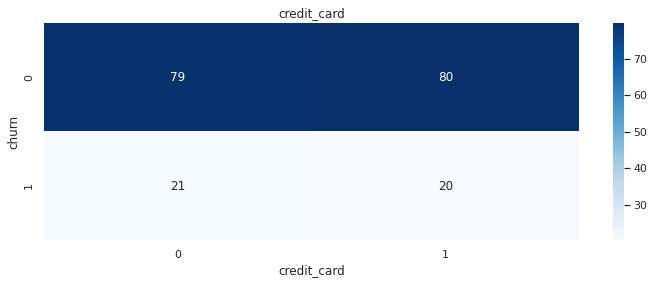

In [123]:
heatmap_churn ('credit_card')

Наличие кредитной карты не связано с оттоком


Количество пользователей. Отток по категории loyalty



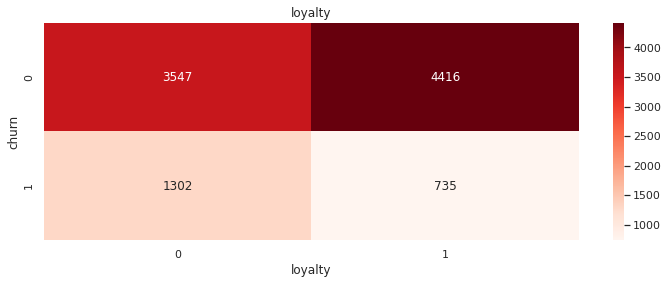


Проценты. Отток по категории loyalty



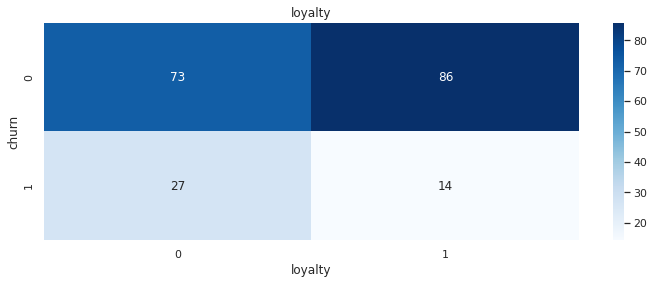

In [124]:
heatmap_churn ('loyalty')

27% неактивных клиентов попадают в отток против 14% активных

### Корреляционный анализ

Создадим датафрейм, с котором закодируем города one-hot кодировкой для проверки корреляции

In [125]:
y = pd.get_dummies(df.city, prefix='city')
df_corr = pd.concat([df,y], axis=1)
df_corr.head()


,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,objects_category,salary_category,age_category,score_category,balance_category,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,"101,348.88",1,1-2 объекта,высокий достаток,среднего возраста,средний уровень,менее 5000р,0,0,1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0,1-2 объекта,высокий достаток,среднего возраста,средний уровень,более 100 000р,0,1,0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1,боле 7 объектов,высокий достаток,среднего возраста,средний уровень,более 100 000р,0,0,1
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,"93,826.63",0,1-2 объекта,средний достаток,среднего возраста,средний уровень,менее 5000р,0,0,1
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0,1-2 объекта,средний достаток,среднего возраста,высокий уровень,более 100 000р,0,1,0


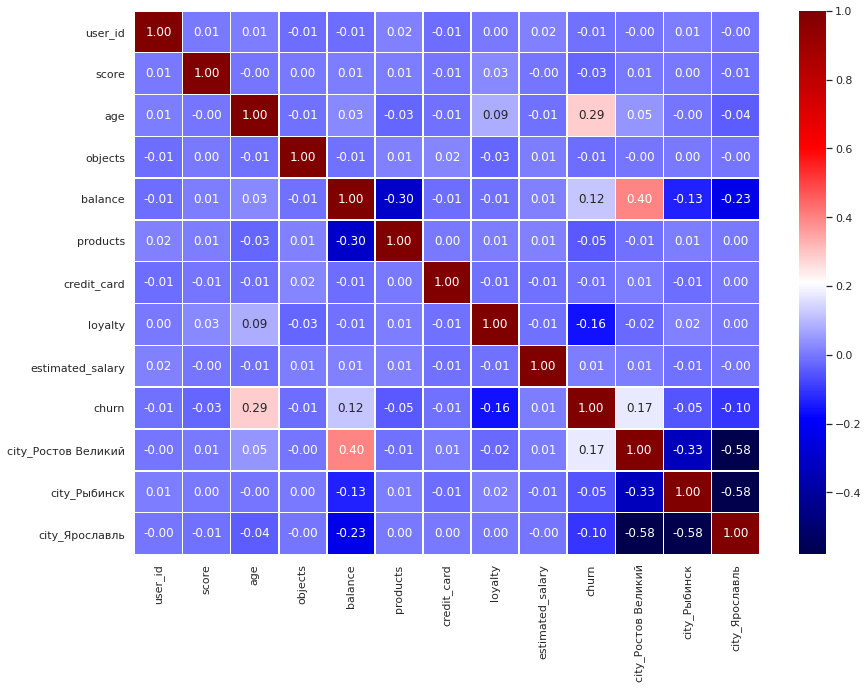

In [126]:
corr_matrix = df_corr.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix , annot = True, fmt = '0.2f', linewidths=.5, cmap="seismic")
plt.show()

* Судя по матрице корреляций самое заметное влияние на отток имеют такие признаки как возраст (слабая корреляция), баланс (Корреляция на уровне тенденции) и активность клиента (тенденция к обратной корреляции). 

* Баланс счета имеет слабую обратную корреляцию с количеством продуктов, которыми пользуется клиент.

* В Ростове клиенты с самым высоким балансом (корреляция 0,4). При этом в этом городе самый высокий отток (коэффоициент корреляции 0,17)


**Выводы** 

**Клиенты, склонные уходить в отток** 
* в отток чаще попадают женщины
* клиенты среднего возраста (35-40 лет). Клиенты пенсионного возраста, их всего 8% от общего числа клиентов в данной выборке, но в этой категории самый высокий процент оттока - 37% (от общего числа в этой категории).
* стоит обратить внимание на клиентов не имеющих объектов в собственности 23% ушедших в отток (от общего числа в этой категории). Это незначительно больше,чем в других категориях.
* клиенты со низким уровнем кредитного скоринга (менее 500 баллов)незначительно чаще других групп уходят в отток (23% от общего числа в этой категории).
* неактивные клиенты.
* у клиента есть кредитная карта.
* Клиенты с оцененным уровнем дохода 5 000-30 000р. (55% этой категории попали в отток). Также стоит обратить внимание на клиентов с доходом 30 000 - 50 000р. (20% попали в отток)
* клиенты пользующиеся 3-4 продуктами (в случае 4 продуктов это 100%-ый отток).

**Клиенты, не склонны уходить в отток**
* в отток реже попадают мужчины
* по категориям самые стабильные молодые клиенты (до 30 лет), их 92% лояльных.
* клиенты имеющие 5 - 7 объектов в собственности, немного меннее склонны уходить в отток. 
* активные клиенты
* с высоким достатком. Или клиенты с оцененным достатком до 5 000рю Возможно о доходах последних просто известно меньше всего. 
* клиенты использующие 1-2 продукта.

##  Сегментирование пользователей на основе данных о количестве потребляемых продуктов
Подробнее посмотрим на связь количества протребляемых продуктов и отток пользователей. 


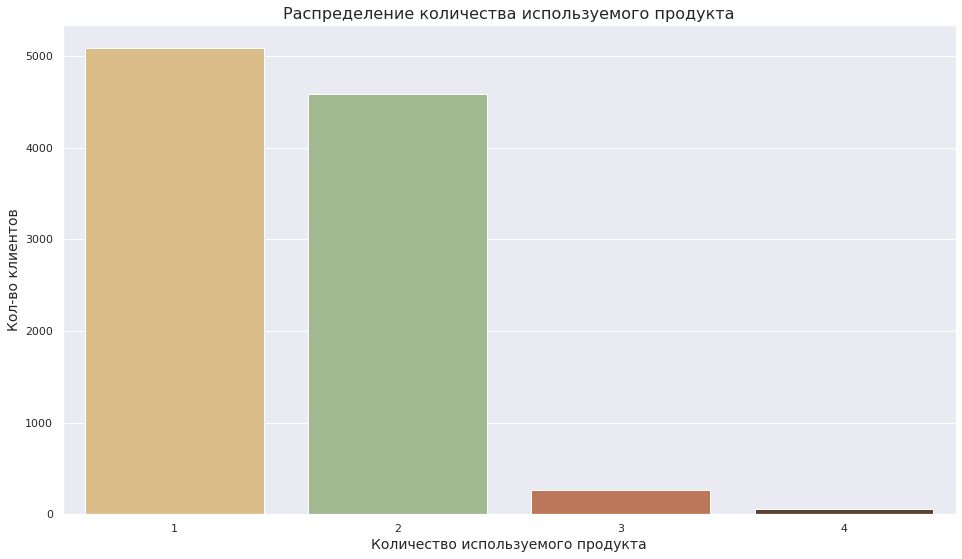

In [127]:
report = df.groupby('products').count().reset_index().sort_values(by='user_id', ascending=False)
ax = sns.barplot(x='products', y='user_id', data=report, palette=colors) 

ax.set_ylabel('Кол-во клиентов', fontsize=14)
ax.set_xlabel('Количество используемого продукта', fontsize=14)
ax.set_title('Распределение количества используемого продукта', fontsize=16)
plt.show()

In [128]:
df.groupby('products').agg(
    {'user_id':'count','churn':'sum', 'age':'mean', 
     'objects':'mean', 'credit_card':'sum', 'loyalty':'sum',
    'estimated_salary':'mean', })

,user_id,churn,age,objects,credit_card,loyalty,estimated_salary
products,,,,,,,
1,5084,1409,39.67,4.97,3578,2563,"99,487.26"
2,4590,348,37.75,5.05,3246,2446,"100,452.01"
3,266,220,43.20,5.00,190,113,"104,318.13"
4,60,60,45.68,5.30,41,29,"104,763.72"


In [129]:
data = df\
    .pivot_table(
        index='churn',
        columns='products',
        values='user_id',
        aggfunc='count'
    )
data

products,1,2,3,4
churn,,,,
0,"3,675.00","4,242.00",46.00,NaN
1,"1,409.00",348.00,220.00,60.00


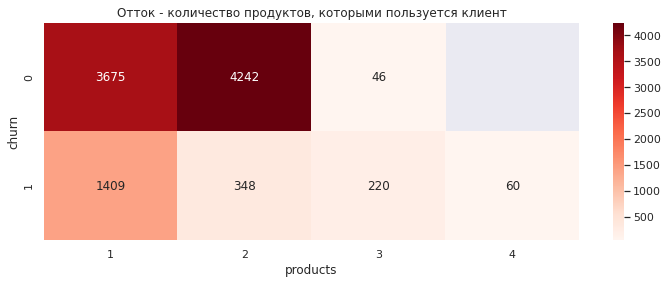

In [130]:
plt.figure(figsize=(12, 4))
sns.heatmap(data, cmap='Reds', annot=True, fmt='.0f')
plt.title('Отток - количество продуктов, которыми пользуется клиент')
plt.show()

In [131]:
data_new = in_precents(data)
plt.figure(figsize=(12, 4))
sns.heatmap(data_new, cmap='Blues', annot=True, fmt='.0f')
plt.title('Отток - количество продуктов, которыми пользуется клиент, (в %)')
plt.show()

NameError: name 'in_precents' is not defined

Кажется, что уход в отток довольно сильно связан с количеством используемого продукта.  Среди тех, кто пользуется 4 продуктами все попадают в отток. 83% клиентов использующих 3 продукта попадают в отток. 28% использующих 1 продукт попадают в отток и только 8% использующих 2 продукта клиентов попадают в отток, это самая постоянная группа. Проверим это предположение используя статистический критерий.

### Гипотеза о связи между количеством используемтого продукта и оттоком пользователей.

Для проверки гипотезы используем U-критерий (Манна-Уитни).

Сформулируем гипотезы

H0: Количество используемых продуктов клиентами, которые ушли, не отличается от количества используемых продуктов клиентов, которые остались

H1: Количество используемых продуктов клиентами, которые ушли, отличается от количества используемых продуктов клиентов, которые остались

In [ ]:
alpha = 0.01

results = st.mannwhitneyu(df[df['churn']==1]['products'], df[df['churn']==0]['estimated_salary'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: различия случайны")

**Вывод**

Разница в количестве используемых продуктов среди пользователей ушедших в отток и не ушедших статистически значима, группы различаются. 

Пользователи, использующие 2 продукта реже всего попадают в отток. На втором месте пользователи, использующие 1 продукт. 

Пользователи, использующие 3 или 4 продукта с высокой степенью вероятности попадут в отток. 


### Гипотиза о различии дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.


Построим распределение уровня дохода клиентов

In [ ]:
sns_plot = sns.distplot(df['estimated_salary'])
fig = sns_plot.get_figure()
plt.title('Распределение уровня дохода клиентов')

Для проверки гипотезы используем U-критерий (Манна-Уитни).

Сформулируем гипотезы

H0: Доход клиентов, которые пользуются одним продуктом банка не отличается от дохода клиентов, которые используют два продукта

H1: Доход клиентов, которые пользуются одним продуктом банка отличается от дохода клиентов, которые используют два продукта

In [ ]:
alpha = 0.05

results = st.mannwhitneyu(df[df['products']==1]['estimated_salary'], df[df['products']==2]['estimated_salary'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: различия случайны")

In [ ]:
print('Медианное значение дохода у тех, кто использует 1 продукт:', df[df['products']==1]['estimated_salary'].median())
print('Медианное значение дохода у тех, кто использует 2 продукта:', df[df['products']==2]['estimated_salary'].median())

**Вывод** 

Доход клиентов, которые используют 2 продукта немного превосходит доход клиентв, которые используют 1 продут. Но разница случайна, статистически не значима

## Кластеризация клиентов
Обучим модель и выполним кластерный анализ. Опишем кластеры. Сравним отток среди полученных кластеров. На основании полученных кластеров постараемся определить, какие клиенты чаще других уходят а какие наиболее лояльны. 

Переведем названия городов и пол в числовые значения, чтобы можно было обучить модель.

* Ярославль - 0
* Рыбинск - 1
* Ростов Великий - 2

* Жен - 0
* Муж- 1

In [ ]:
df['city'] = df['city'].replace({'Ярославль':0, 'Рыбинск': 1, 'Ростов Великий': 2})
df['gender'] = df['gender'].replace({'Ж':0, 'М': 1})

df.drop('salary_category', axis=1, inplace=True)
df.drop('age_category', axis=1, inplace=True)
df.drop('objects_category', axis=1, inplace=True)
df.drop('balance_category', axis=1, inplace=True)
df.drop('score_category', axis=1, inplace=True)


In [ ]:
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')
linked = linkage(df_sс, method = 'ward')

In [ ]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

Вылеляются 4 кластера. Посмотрим на них подробнее.

In [ ]:
km = KMeans(n_clusters = 4)
labels = km.fit_predict(df_sс)
df['cluster'] = labels

df.cluster.value_counts()

In [ ]:
df.groupby('cluster').mean().T


Самый большой отток клиентов у четвертого кластера (32%). В большинстве своём это клиенты из Ростова

In [ ]:
for column in ['gender', 'credit_card', 'loyalty']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column],  hue='cluster', data=df, palette=colors)
    plt.title(column)
    plt.show()

1 и 2 кластер - клиенты, у которых есть кредитная карта. У всех клиентов третьего кластера нет крудитной карты. Четвертый кластер (с наибольшим оттоком) включате как пользователей с кредитной картой, так и без. Но у большинства она есть. 

In [ ]:
for column in ['score', 'city', 'age', 'objects', 'balance', 'products', 'estimated_salary']:
    plt.figure(figsize=(5, 5))
    plt.title(column)   
    sns.kdeplot(df.query('cluster==0')[column], label = 'Кластер 0')
    sns.kdeplot(df.query('cluster==1')[column], label = 'Кластер 1')
    sns.kdeplot(df.query('cluster==2')[column], label = 'Кластер 2')
    sns.kdeplot(df.query('cluster==3')[column], label = 'Кластер 3')
    
    sns.set_style('whitegrid')
    plt.legend()
    plt.show()

* Все клиенты из Ростова вошли в 4ый кластер. 
* Большинство клиентов без дебетовой карты относятся ко второму кластеру. 
* Клиенты 1 кластера чаще всего пользуются 1 продуктом. Клиенты второго кластера - двумя продуктами. 


**Выводы** 

Оптимально выделить 4 кластера. 

Самый большой отток у 4ого кластера.тот кластер характеризуются клиентами из Ростова. Боьшинство клиентов этого кластера имеют банковскую карту. 

## Выводы и рекомендации

**Портреты клиентов**

**Клиенты, склонные уходить в отток** 
* в отток чаще попадают женщины
* клиенты среднего возраста (35-40 лет). Клиенты пенсионного возраста, их всего 8% от общего числа клиентов в данной выборке, но в этой категории самый высокий процент оттока - 37% (от общего числа в этой категории).
* стоит обратить внимание на клиентов не имеющих объектов в собственности 23% ушедших в отток (от общего числа в этой категории). Это незначительно больше,чем в других категориях.
* клиенты со низким уровнем кредитного скоринга (менее 500 баллов)незначительно чаще других групп уходят в отток (23% от общего числа в этой категории).
* неактивные клиенты.
* у клиента есть кредитная карта.
* Клиенты с оцененным уровнем дохода 5 000-30 000р. (55% этой категории попали в отток). Также стоит обратить внимание на клиентов с доходом 30 000 - 50 000р. (20% попали в отток)
* клиенты пользующиеся 3-4 продуктами (в случае 4 продуктов это 100%-ый отток).
* клиенты из Ростова

**Клиенты, не склонны уходить в отток**
* в отток реже попадают мужчины
* по категориям самые стабильные молодые клиенты (до 30 лет), их 92% лояльных.
* клиенты имеющие 5 - 7 объектов в собственности, немного меннее склонны уходить в отток. 
* активные клиенты
* с высоким достатком. Или клиенты с оцененным достатком до 5 000р. Возможно, о доходах последних просто известно меньше всего. 
* клиенты использующие 1-2 продукта.

**Связь количества используемых продуктов и ухода в отток** 

Разница в количестве используемых продуктов среди пользователей ушедших в отток и не ушедших статистически значима.

Пользователи, использующие 2 продукта реже всего попадают в отток (только 8% попадают в отток). На втором месте пользователи, использующие 1 продукт(28% попадают в отток). Среди тех, кто пользуется 4 продуктами все попадают в отток. 83% клиентов использующих 3 продукта попадают в отток.

**Различие дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.**

Доход пользователей, которые пользуются двумя продуктами банка не отличается от дохода пользователей, пользующихся одним продуктом. 


**Рекомендации** 
* Довольно высокий процент клиентов **среднего возраста** попадает в отток (22%). Для таких клиентов актуальным предложением может стать **ипотека** на жильё или **кредит на покупку автомобиля**. Продвижение этих услуг в данной группе может снизить отток. Также в текущих обстоятельствах актуальна **сельская ипотека**, так как с возрастанием возможности удалённой работы многие люди этой категории принимают решение о переезде в сельскую местность.  
* Очень высокий отток среди пенсионеров. Это самая малочисленная возростная группа среди пользователей банка. Им можно предложить социальную программы **оплаты коммунальных услуг без комиссии**. Такая программа повысит популярность банка среди данной категории и уменьшит отток. 
* Высокий отток среди **неактивных** клиентов. Предложение **кеш бек системы для кредитных карт** должна повысить активность использования кредитных карт и уменьшить отток. 
* Высокий отток среди клиентов, которые **используют 3-4 продукта**. Вероятно, люди начинают пользоваться новыми продуктами, когда два продукта, которые они уже используют не закрывают их потребности и уходят когда оказывается, что другие продукты также не закрывают потребности. Начало использования третьего продукта должно быть маячком, после которого сотрудник банка должен связаться с клиентом, прояснить его потребности и сделать **индивидуальное предложение под запрос клиента**. В дальнейшем это поможет в разработке нового продукта. 
* Таргетировать рекламу на молодых клиентов (до 30 лет) и на клиентов с высоким заработком. Эти группы самые лояльные. 
* Провести проверку офисов **в Ростове**. В этом городе отток значительно выше, чем в других городах при тех же предложениях. Возможно, проблема в **качестве обслуживания**. 